In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
X.shape

(506, 13)

In [6]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
Y.shape

(506,)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Using Sklearn

In [11]:
clf = SGDRegressor()
clf.fit(X,Y)

c:\users\sahil\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [12]:
mean_squared_error(Y,clf.predict(X))

22.8706208219942

In [13]:
_W1 = clf.coef_
_B1 = clf.intercept_

In [14]:
_W1

array([-0.63853518,  0.57824102, -0.3228565 ,  0.81611229, -1.08736787,
        3.10088725, -0.01703836, -2.10111646,  0.99486493, -0.36523849,
       -1.8556728 ,  0.83868494, -3.40711091])

In [15]:
_B1

array([22.38332442])

# Custom GD

In [16]:
n_iter = 10000
r = 0.01
N = X.shape[0]
W = np.random.normal(size=13)
B = np.random.normal(size=1)

In [17]:
W

array([ 0.34249527,  1.56238351, -0.21374916, -0.24688539,  0.37835649,
       -1.57014716, -0.48728497, -0.68454262,  0.98554942,  0.48503418,
        0.01211782,  0.72440424,  0.09243923])

In [18]:
B

array([0.63127024])

In [19]:
N

506

In [20]:
predict_value = X.dot(W) - B
predict_value.shape

(506,)

In [21]:
error = Y - predict_value
error.shape

(506,)

In [22]:
_sum_w = (-2) * X.T.dot(error)
_sum_w.shape

(13,)

In [23]:
_sum_b = (-2) * np.sum(error)
_sum_b

-23442.04548184834

In [24]:
while n_iter > 0:
    n_iter -= 1
    predict_value = X.dot(W) + B
    error = Y - predict_value
    if n_iter % 1000 == 0:
        print('Epoch:{0}, MSE:{1}'.format(10000-n_iter,mean_squared_error(Y,predict_value)))
    _sum_w = (-2) * X.T.dot(error)
    _sum_b = (-2) * np.sum(error)
    W = W - r * _sum_w / N
    B = B - r * _sum_b / N

Epoch:1000, MSE:21.941804634309364
Epoch:2000, MSE:21.89841451941127
Epoch:3000, MSE:21.895113097524177
Epoch:4000, MSE:21.894853371173934
Epoch:5000, MSE:21.89483292826008
Epoch:6000, MSE:21.894831319198637
Epoch:7000, MSE:21.894831192549418
Epoch:8000, MSE:21.894831182580862
Epoch:9000, MSE:21.89483118179624
Epoch:10000, MSE:21.89483118173448


In [25]:
mean_squared_error(Y, predict_value)

21.89483118173448

In [26]:
import matplotlib.pyplot as plt

In [27]:
predict_value = X.dot(W) + B

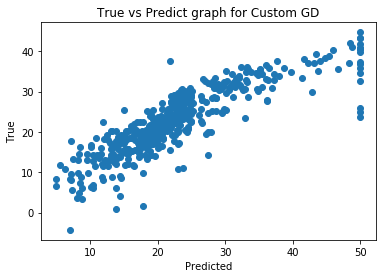

In [28]:
plt.scatter(Y, predict_value)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('True vs Predict graph for Custom GD')
plt.show()

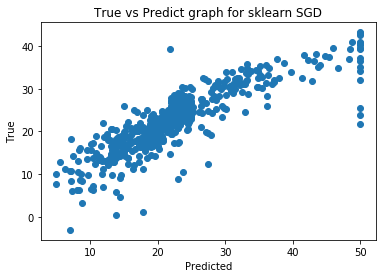

In [29]:
plt.scatter(Y,clf.predict(X))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('True vs Predict graph for sklearn SGD')
plt.show()

In [30]:
from prettytable import PrettyTable

In [31]:
x = PrettyTable()

x.field_names = ["Model", "Weights", "Intercept", "MSE"]

x.add_row(["sklearn", _W1, _B1, mean_squared_error(Y,clf.predict(X))])
x.add_row(["custom", W, B, mean_squared_error(Y,predict_value)])

print(x)

+---------+--------------------------------------------------------------------------+---------------+-------------------+
|  Model  |                                 Weights                                  |   Intercept   |        MSE        |
+---------+--------------------------------------------------------------------------+---------------+-------------------+
| sklearn | [-0.63853518  0.57824102 -0.3228565   0.81611229 -1.08736787  3.10088725 | [22.38332442] |  22.8706208219942 |
|         |  -0.01703836 -2.10111646  0.99486493 -0.36523849 -1.8556728   0.83868494 |               |                   |
|         |                               -3.40711091]                               |               |                   |
|  custom | [-0.92814565  1.08156789  0.14089771  0.68174005 -2.05671787  2.67423058 | [22.53280632] | 21.89483118173447 |
|         |   0.01946572 -3.10404442  2.66221188 -2.07677513 -2.06060645  0.84926838 |               |                   |
|         |     